In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm

nba_data_to_load = "Resources/NBA Stats 2009-19.xlsx"
nba_data_09_10_df = pd.read_excel(nba_data_to_load, "2009-10")
nba_data_10_11_df = pd.read_excel(nba_data_to_load, "2010-11")
nba_data_11_12_df = pd.read_excel(nba_data_to_load, "2011-12")
nba_data_12_13_df = pd.read_excel(nba_data_to_load, "2012-13")
nba_data_13_14_df = pd.read_excel(nba_data_to_load, "2013-14")
nba_data_14_15_df = pd.read_excel(nba_data_to_load, "2014-15")
nba_data_15_16_df = pd.read_excel(nba_data_to_load, "2015-16")
nba_data_16_17_df = pd.read_excel(nba_data_to_load, "2016-17")
nba_data_17_18_df = pd.read_excel(nba_data_to_load, "2017-18")
nba_data_18_19_df = pd.read_excel(nba_data_to_load, "2018-19")
nba_data_df = pd.concat([nba_data_09_10_df,nba_data_10_11_df,nba_data_11_12_df,nba_data_12_13_df,nba_data_13_14_df,nba_data_14_15_df,nba_data_15_16_df,nba_data_16_17_df,nba_data_17_18_df,nba_data_18_19_df])

In [6]:
nba_data_ready_df = nba_data_df[["TEAM","Season","WIN%", "PTS", "FGM", "FGA", "3PM", "3PA", "FTM", "FTA"]]
nba_data_ready_df

,TEAM,Season,WIN%,PTS,FGM,FGA,3PM,3PA,FTM,FTA
0,Atlanta Hawks,2009-10,0.646,101.7,38.8,82.9,6.4,17.7,17.7,23.3
1,Boston Celtics,2009-10,0.610,99.2,37.1,76.8,6.1,17.5,19.0,25.5
2,Charlotte Bobcats,2009-10,0.537,95.3,34.9,76.9,5.6,16.2,20.0,26.6
3,Chicago Bulls,2009-10,0.500,97.5,37.6,83.2,4.3,13.0,18.0,23.9
4,Cleveland Cavaliers,2009-10,0.744,102.1,37.8,77.9,7.3,19.3,19.1,26.6
5,Dallas Mavericks,2009-10,0.671,102.0,38.3,82.4,6.8,18.3,18.6,22.8
6,Denver Nuggets,2009-10,0.646,106.5,38.1,81.4,6.6,18.5,23.6,30.6
7,Detroit Pistons,2009-10,0.329,94.0,35.9,80.5,4.6,14.5,17.7,24.4
8,Golden State Warriors,2009-10,0.317,108.8,40.6,86.5,7.7,20.6,19.9,25.4
9,Houston Rockets,2009-10,0.512,102.4,37.7,84.4,7.9,22.4,19.0,24.7


Text(0.5, 0, 'Season')

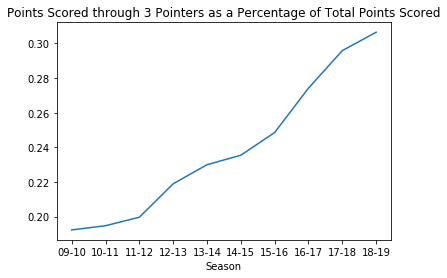

In [7]:
threepm_pts_09 = nba_data_09_10_df["3PM"].mean()*3/nba_data_09_10_df["PTS"].mean()
threepm_pts_10 = nba_data_10_11_df["3PM"].mean()*3/nba_data_10_11_df["PTS"].mean()
threepm_pts_11 = nba_data_11_12_df["3PM"].mean()*3/nba_data_11_12_df["PTS"].mean()
threepm_pts_12 = nba_data_12_13_df["3PM"].mean()*3/nba_data_12_13_df["PTS"].mean()
threepm_pts_13 = nba_data_13_14_df["3PM"].mean()*3/nba_data_13_14_df["PTS"].mean()
threepm_pts_14 = nba_data_14_15_df["3PM"].mean()*3/nba_data_14_15_df["PTS"].mean()
threepm_pts_15 = nba_data_15_16_df["3PM"].mean()*3/nba_data_15_16_df["PTS"].mean()
threepm_pts_16 = nba_data_16_17_df["3PM"].mean()*3/nba_data_16_17_df["PTS"].mean()
threepm_pts_17 = nba_data_17_18_df["3PM"].mean()*3/nba_data_17_18_df["PTS"].mean()
threepm_pts_18 = nba_data_18_19_df["3PM"].mean()*3/nba_data_18_19_df["PTS"].mean()
threepm_pts = []
threepm_pts.append(threepm_pts_09)
threepm_pts.append(threepm_pts_10)
threepm_pts.append(threepm_pts_11)
threepm_pts.append(threepm_pts_12)
threepm_pts.append(threepm_pts_13)
threepm_pts.append(threepm_pts_14)
threepm_pts.append(threepm_pts_15)
threepm_pts.append(threepm_pts_16)
threepm_pts.append(threepm_pts_17)
threepm_pts.append(threepm_pts_18)
threepm_pts
plt.plot(["09-10", "10-11", "11-12", "12-13", "13-14", "14-15", "15-16", "16-17", "17-18", "18-19"],threepm_pts)
plt.title("Points Scored through 3 Pointers as a Percentage of Total Points Scored")
plt.xlabel("Season")

Text(0.5, 0, 'Season')

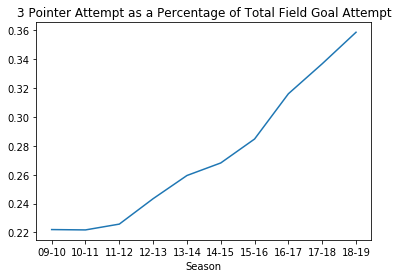

In [8]:
threepa_fga_09 = nba_data_09_10_df["3PA"].mean()/nba_data_09_10_df["FGA"].mean()
threepa_fga_10 = nba_data_10_11_df["3PA"].mean()/nba_data_10_11_df["FGA"].mean()
threepa_fga_11 = nba_data_11_12_df["3PA"].mean()/nba_data_11_12_df["FGA"].mean()
threepa_fga_12 = nba_data_12_13_df["3PA"].mean()/nba_data_12_13_df["FGA"].mean()
threepa_fga_13 = nba_data_13_14_df["3PA"].mean()/nba_data_13_14_df["FGA"].mean()
threepa_fga_14 = nba_data_14_15_df["3PA"].mean()/nba_data_14_15_df["FGA"].mean()
threepa_fga_15 = nba_data_15_16_df["3PA"].mean()/nba_data_15_16_df["FGA"].mean()
threepa_fga_16 = nba_data_16_17_df["3PA"].mean()/nba_data_16_17_df["FGA"].mean()
threepa_fga_17 = nba_data_17_18_df["3PA"].mean()/nba_data_17_18_df["FGA"].mean()
threepa_fga_18 = nba_data_18_19_df["3PA"].mean()/nba_data_18_19_df["FGA"].mean()
threepa_fga = []
threepa_fga.append(threepa_fga_09)
threepa_fga.append(threepa_fga_10)
threepa_fga.append(threepa_fga_11)
threepa_fga.append(threepa_fga_12)
threepa_fga.append(threepa_fga_13)
threepa_fga.append(threepa_fga_14)
threepa_fga.append(threepa_fga_15)
threepa_fga.append(threepa_fga_16)
threepa_fga.append(threepa_fga_17)
threepa_fga.append(threepa_fga_18)
threepa_fga
plt.plot(["09-10", "10-11", "11-12", "12-13", "13-14", "14-15", "15-16", "16-17", "17-18", "18-19"],threepa_fga)
plt.title("3 Pointer Attempt as a Percentage of Total Field Goal Attempt")
plt.xlabel("Season")

In [9]:
model_3pm = sm.OLS(nba_data_ready_df["WIN%"],nba_data_ready_df["3PM"]).fit() 
model_3pm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   WIN%   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     2381.
Date:                Mon, 01 Jul 2019   Prob (F-statistic):          1.99e-144
Time:                        22:52:45   Log-Likelihood:                 97.724
No. Observations:                 300   AIC:                            -193.4
Df Residuals:                     299   BIC:                            -189.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
3PM            0.0579      0.001     48.794      0.000       0.056       0.060
==============================================================================
Omnibus:                        0.620   Durbin-Watson:                   1.381
Prob(Omnibus):                  0.734   Jarque-Bera (JB):                0.730
Skew:                          -0.038   Prob(JB):                        0.694
Kurtosis:                       2.771   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

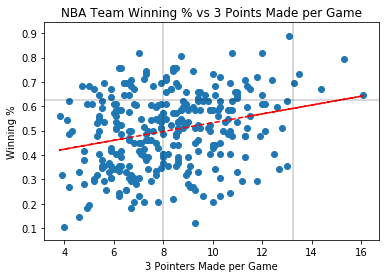

In [10]:
plt.scatter( nba_data_ready_df["3PM"],nba_data_ready_df["WIN%"])
plt.title("NBA Team Winning % vs 3 Points Made per Game")
plt.xlabel("3 Pointers Made per Game")
plt.ylabel("Winning %")
z = np.polyfit(nba_data_ready_df["3PM"], nba_data_ready_df["WIN%"], 1)
p = np.poly1d(z)
plt.plot(nba_data_ready_df["3PM"],p(nba_data_ready_df["3PM"]),"r--")
plt.axhline(0.625, alpha = 0.2, color = "k")
plt.axvline(8, alpha = 0.2, color = "k")
plt.axvline(13.25, alpha = 0.2, color = "k")
plt.show()

In [11]:
model_pts = sm.OLS(nba_data_ready_df["WIN%"],nba_data_ready_df["PTS"]).fit()
model_pts.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   WIN%   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     3619.
Date:                Mon, 01 Jul 2019   Prob (F-statistic):          4.27e-169
Time:                        22:52:46   Log-Likelihood:                 154.70
No. Observations:                 300   AIC:                            -307.4
Df Residuals:                     299   BIC:                            -303.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PTS            0.0049   8.17e-05     60.158      0.000       0.005       0.005
==============================================================================
Omnibus:                       15.676   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.659
Skew:                          -0.169   Prob(JB):                       0.0217
Kurtosis:                       2.294   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
wins_by_shot_09_10 = nba_data_09_10_df[["TEAM","WIN%","3PA","3PM"]]
wins_by_shot_10_11 = nba_data_10_11_df[["TEAM","WIN%","3PA","3PM"]]
wins_by_shot_11_12 = nba_data_11_12_df[["TEAM","WIN%","3PA","3PM"]]
wins_by_shot_12_13 = nba_data_12_13_df[["TEAM","WIN%","3PA","3PM"]]
wins_by_shot_13_14 = nba_data_13_14_df[["TEAM","WIN%","3PA","3PM"]]
wins_by_shot_14_15 = nba_data_14_15_df[["TEAM","WIN%","3PA","3PM"]]
wins_by_shot_15_16 = nba_data_15_16_df[["TEAM","WIN%","3PA","3PM"]]
wins_by_shot_16_17 = nba_data_16_17_df[["TEAM","WIN%","3PA","3PM"]]
wins_by_shot_17_18 = nba_data_17_18_df[["TEAM","WIN%","3PA","3PM"]]
wins_by_shot_18_19 = nba_data_18_19_df[["TEAM","WIN%","3PA","3PM"]]

In [13]:
merged_09_10 = pd.merge(wins_by_shot_09_10, wins_by_shot_10_11, how='outer', on=['TEAM'])
merged_09_10 = merged_09_10.rename(columns={"3PA_x":"'09-10 3PA", "3PM_x":"'09-10 3PM", "WIN%_x":"'09-10 WIN%"})
merged_09_10 = merged_09_10.rename(columns={"3PA_y":"'10-11 3PA", "3PM_y":"'10-11 3PM", "WIN%_y":"'10-11 WIN%"})

In [14]:
seasons_combined = pd.merge(merged_09_10, wins_by_shot_11_12, how='outer', on=['TEAM'])
seasons_combined = seasons_combined.rename(columns={"3PA":"'11-12 3PA", "3PM":"'11-12 3PM", "WIN%":"'11-12 WIN%"})

In [15]:
seasons_combined = pd.merge(seasons_combined, wins_by_shot_12_13, how='outer', on=['TEAM'])
seasons_combined = seasons_combined.rename(columns={"3PA":"'12-13 3PA", "3PM":"'12-13 3PM", "WIN%":"'12-13 WIN%"})

In [16]:
seasons_combined = pd.merge(seasons_combined, wins_by_shot_13_14, how='outer', on=['TEAM'])
seasons_combined = seasons_combined.rename(columns={"3PA":"'13-14 3PA", "3PM":"'13-14 3PM", "WIN%":"'13-14 WIN%"})

In [17]:
seasons_combined = pd.merge(seasons_combined, wins_by_shot_14_15, how='outer', on=['TEAM'])
seasons_combined = seasons_combined.rename(columns={"3PA":"'14-15 3PA", "3PM":"'14-15 3PM", "WIN%":"'14-15 WIN%"})

In [ ]:
seasons_combined = pd.merge(seasons_combined, wins_by_shot_15_16, how='outer', on=['TEAM'])
seasons_combined = seasons_combined.rename(columns={"3PA":"'15-16 3PA", "3PM":"'15-16 3PM", "WIN%":"'15-16 WIN%"})

In [ ]:
seasons_combined = pd.merge(seasons_combined, wins_by_shot_16_17, how='outer', on=['TEAM'])
seasons_combined = seasons_combined.rename(columns={"3PA":"'16-17 3PA", "3PM":"'16-17 3PM", "WIN%":"'16-17 WIN%"})

In [ ]:
seasons_combined = pd.merge(seasons_combined, wins_by_shot_17_18, how='outer', on=['TEAM'])
seasons_combined = seasons_combined.rename(columns={"3PA":"'17-18 3PA", "3PM":"'17-18 3PM", "WIN%":"'17-18 WIN%"})

In [ ]:
seasons_combined = pd.merge(seasons_combined, wins_by_shot_18_19, how='outer', on=['TEAM'])
seasons_combined = seasons_combined.rename(columns={"3PA":"'18-19 3PA", "3PM":"'18-19 3PM", "WIN%":"'18-19 WIN%"})
seasons_combined

,TEAM,'09-10 WIN%,'09-10 3PA,'09-10 3PM,'10-11 WIN%,'10-11 3PA,'10-11 3PM,'11-12 WIN%,'11-12 3PA,'11-12 3PM,...,'15-16 3PM,'16-17 WIN%,'16-17 3PA,'16-17 3PM,'17-18 WIN%,'17-18 3PA,'17-18 3PM,'18-19 WIN%,'18-19 3PA,'18-19 3PM
0,Atlanta Hawks,0.646,17.7,6.4,0.537,17.4,6.1,0.606,20.2,7.5,...,9.9,0.524,26.1,8.9,0.293,31.0,11.2,0.354,37.0,13.0
1,Boston Celtics,0.610,17.5,6.1,0.683,13.6,5.0,0.591,15.0,5.5,...,8.7,0.646,33.4,12.0,0.671,30.4,11.5,0.598,34.5,12.6
2,Charlotte Bobcats,0.537,16.2,5.6,0.415,14.7,4.8,0.106,13.5,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Chicago Bulls,0.500,13.0,4.3,0.756,17.3,6.2,0.758,16.9,6.3,...,7.9,0.500,22.3,7.6,0.329,31.1,11.0,0.268,25.9,9.1
4,Cleveland Cavaliers,0.744,19.3,7.3,0.232,18.2,6.2,0.318,19.3,6.7,...,10.7,0.622,33.9,13.0,0.610,32.1,12.0,0.232,29.1,10.3
5,Dallas Mavericks,0.671,18.3,6.8,0.695,21.6,7.9,0.545,22.2,7.5,...,9.8,0.402,30.2,10.7,0.293,32.8,11.8,0.402,36.6,12.5
6,Denver Nuggets,0.646,18.5,6.6,0.610,20.8,8.1,0.576,19.9,6.6,...,8.0,0.488,28.8,10.6,0.561,30.9,11.5,0.659,31.4,11.0
7,Detroit Pistons,0.329,14.5,4.6,0.366,15.3,5.8,0.379,13.9,4.8,...,9.0,0.451,23.4,7.7,0.476,28.9,10.8,0.500,34.8,12.1
8,Golden State Warriors,0.317,20.6,7.7,0.439,21.3,8.4,0.348,20.5,7.9,...,13.1,0.817,31.2,12.0,0.707,28.9,11.3,0.695,34.4,13.3
9,Houston Rockets,0.512,22.4,7.9,0.524,22.5,8.3,0.515,20.2,7.2,...,10.7,0.671,40.3,14.4,0.793,42.3,15.3,0.646,45.4,16.1


In [ ]:
team_name = input("Which team's stats would you like to look at?")

In [ ]:
win_percentage_over_time = seasons_combined.loc[seasons_combined["TEAM"]==team_name,["'09-10 WIN%","'10-11 WIN%", "'11-12 WIN%", "'12-13 WIN%", "'13-14 WIN%", "'14-15 WIN%","'15-16 WIN%","'16-17 WIN%","'17-18 WIN%","'18-19 WIN%"]]
three_points_attempted_over_time = seasons_combined.loc[seasons_combined["TEAM"]==team_name,["'09-10 3PA","'10-11 3PA","'11-12 3PA","'12-13 3PA","'13-14 3PA","'14-15 3PA","'15-16 3PA","'16-17 3PA","'17-18 3PA","'18-19 3PA"]]
three_points_made_over_time = seasons_combined.loc[seasons_combined["TEAM"]==team_name,["'09-10 3PM","'10-11 3PM","'11-12 3PM","'12-13 3PM","'13-14 3PM","'14-15 3PM","'15-16 3PM","'16-17 3PM","'17-18 3PM","'18-19 3PM"]]

In [ ]:
years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Season')
ax1.set_ylabel('3 Points Attempted', color=color)
ax1.plot(years, three_points_attempted_over_time.values.tolist()[0], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('WIN %', color=color)
ax2.plot(years, win_percentage_over_time.values.tolist()[0], color=color)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()

plt.title(team_name + "'s Analysis")
plt.show()

In [ ]:
years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('Season')
ax1.set_ylabel('3 Points Made', color=color)
ax1.plot(years, three_points_made_over_time.values.tolist()[0], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('WIN %', color=color)  # we already handled the x-label with ax1
ax2.plot(years, win_percentage_over_time.values.tolist()[0], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.title(team_name + "'s Analysis")
plt.show()

In [ ]:
nba_09_10_df = nba_data_09_10_df[["TEAM","Season","WIN%", "PTS", "FGM", "FGA", "3PM", "3PA", "FTM", "FTA"]]
nba_09_10_df

nba_09_10_df_formatted = nba_09_10_df.sort_values(["WIN%"], ascending=False).head(29)
nba_09_10_df_formatted

In [ ]:
top_team_09_10 = nba_09_10_df_formatted.head(1)
top_team_09_10

In [ ]:
bottom_five_teams_09_10 = nba_09_10_df_formatted.tail(5)
bottom_five_teams_09_10

In [ ]:
nba_09_10_total = pd.concat([top_team_09_10,bottom_five_teams_09_10])
nba_09_10_total

In [ ]:
nba_10_11_df = nba_data_10_11_df[["TEAM","Season","WIN%", "PTS", "FGM", "FGA", "3PM", "3PA", "FTM", "FTA"]]
nba_10_11_df

nba_10_11_df_formatted = nba_10_11_df.sort_values(["WIN%"], ascending=False).head(29)
nba_10_11_df_formatted

In [ ]:
top_team_10_11 = nba_10_11_df_formatted.head(1)
top_team_10_11

bottom_five_teams_10_11 = nba_10_11_df_formatted.tail(5)
bottom_five_teams_10_11

In [ ]:
nba_10_11_total = pd.concat([top_team_10_11,bottom_five_teams_10_11])
nba_10_11_total

In [ ]:
nba_11_12_df = nba_data_11_12_df[["TEAM","Season","WIN%", "PTS", "FGM", "FGA", "3PM", "3PA", "FTM", "FTA"]]
nba_11_12_df

nba_11_12_df_formatted = nba_11_12_df.sort_values(["WIN%"], ascending=False).head(29)
nba_11_12_df_formatted

In [ ]:
top_team_11_12 = nba_11_12_df_formatted.head(1)
top_team_11_12

In [ ]:
bottom_five_teams_11_12 = nba_11_12_df_formatted.tail(5)
bottom_five_teams_11_12

In [ ]:
nba_11_12_total = pd.concat([top_team_11_12,bottom_five_teams_11_12])
nba_11_12_total

In [ ]:
nba_12_13_df = nba_data_12_13_df[["TEAM","Season","WIN%", "PTS", "FGM", "FGA", "3PM", "3PA", "FTM", "FTA"]]
nba_12_13_df

nba_12_13_df_formatted = nba_12_13_df.sort_values(["WIN%"], ascending=False).head(29)
nba_12_13_df_formatted

In [ ]:
top_team_12_13 = nba_12_13_df_formatted.head(1)
top_team_12_13

In [ ]:
bottom_five_teams_12_13 = nba_12_13_df_formatted.tail(5)
bottom_five_teams_12_13

In [ ]:
nba_12_13_total = pd.concat([top_team_12_13,bottom_five_teams_12_13])
nba_12_13_total

In [ ]:
nba_13_14_df = nba_data_13_14_df[["TEAM","Season","WIN%", "PTS", "FGM", "FGA", "3PM", "3PA", "FTM", "FTA"]]
nba_13_14_df

nba_13_14_df_formatted = nba_13_14_df.sort_values(["WIN%"], ascending=False).head(29)
nba_13_14_df_formatted

In [ ]:
top_team_13_14 = nba_13_14_df_formatted.head(1)
top_team_13_14

In [ ]:
bottom_five_teams_13_14 = nba_13_14_df_formatted.tail(5)
bottom_five_teams_13_14

In [ ]:
nba_13_14_total = pd.concat([top_team_13_14,bottom_five_teams_13_14])
nba_13_14_total

In [ ]:
nba_14_15_df = nba_data_14_15_df[["TEAM","Season","WIN%", "PTS", "FGM", "FGA", "3PM", "3PA", "FTM", "FTA"]]
nba_14_15_df

nba_14_15_df_formatted = nba_14_15_df.sort_values(["WIN%"], ascending=False).head(29)
nba_14_15_df_formatted

In [ ]:
top_team_14_15 = nba_14_15_df_formatted.head(1)
top_team_14_15

In [ ]:
bottom_five_teams_14_15 = nba_14_15_df_formatted.tail(5)
bottom_five_teams_14_15

In [ ]:
nba_14_15_total = pd.concat([top_team_14_15,bottom_five_teams_14_15])
nba_14_15_total

In [ ]:
nba_15_16_df = nba_data_15_16_df[["TEAM","Season","WIN%", "PTS", "FGM", "FGA", "3PM", "3PA", "FTM", "FTA"]]
nba_15_16_df

nba_15_16_df_formatted = nba_15_16_df.sort_values(["WIN%"], ascending=False).head(29)
nba_15_16_df_formatted

In [ ]:
bottom_five_teams_15_16 = nba_15_16_df_formatted.tail(5)
bottom_five_teams_15_16

In [ ]:
top_team_15_16 = nba_15_16_df_formatted.head(1)
top_team_15_16

In [ ]:
nba_15_16_total = pd.concat([top_team_15_16,bottom_five_teams_15_16])
nba_15_16_total

In [ ]:
nba_16_17_df = nba_data_16_17_df[["TEAM","Season","WIN%", "PTS", "FGM", "FGA", "3PM", "3PA", "FTM", "FTA"]]
nba_16_17_df

nba_16_17_df_formatted = nba_16_17_df.sort_values(["WIN%"], ascending=False).head(29)
nba_16_17_df_formatted

In [ ]:
top_team_16_17 = nba_16_17_df_formatted.head(1)
top_team_16_17

In [ ]:
bottom_five_teams_16_17 = nba_16_17_df_formatted.tail(5)
bottom_five_teams_16_17

In [ ]:
nba_16_17_total = pd.concat([top_team_16_17,bottom_five_teams_16_17])
nba_16_17_total

In [ ]:
nba_17_18_df = nba_data_17_18_df[["TEAM","Season","WIN%", "PTS", "FGM", "FGA", "3PM", "3PA", "FTM", "FTA"]]
nba_17_18_df

nba_17_18_df_formatted = nba_17_18_df.sort_values(["WIN%"], ascending=False).head(29)
nba_17_18_df_formatted

In [ ]:
top_team_17_18 = nba_17_18_df_formatted.head(1)
top_team_17_18

In [ ]:
bottom_five_teams_17_18 = nba_17_18_df_formatted.tail(5)
bottom_five_teams_17_18

In [ ]:
nba_17_18_total = pd.concat([top_team_17_18,bottom_five_teams_17_18])
nba_17_18_total

In [ ]:
nba_18_19_df = nba_data_18_19_df[["TEAM","Season","WIN%", "PTS", "FGM", "FGA", "3PM", "3PA", "FTM", "FTA"]]
nba_18_19_df

nba_18_19_df_formatted = nba_18_19_df.sort_values(["WIN%"], ascending=False).head(29)
nba_18_19_df_formatted

In [ ]:
top_team_18_19 = nba_18_19_df_formatted.head(1)
top_team_18_19

In [ ]:
bottom_five_teams_18_19 = nba_18_19_df_formatted.tail(5)
bottom_five_teams_18_19

In [ ]:
nba_18_19_total = pd.concat([top_team_18_19,bottom_five_teams_18_19])
nba_18_19_total

In [ ]:
nba_top_five_09_19 = pd.concat([top_team_09_10,top_team_10_11,top_team_11_12,top_team_12_13,top_team_13_14,top_team_14_15,top_team_15_16,top_team_16_17,top_team_17_18,top_team_18_19])
nba_top_five_09_19

In [ ]:
#Scatter Plot
nba_2009_10_season = plt.scatter(nba_09_10_total["WIN%"],nba_09_10_total["3PM"])
nba_2010_11_season = plt.scatter(nba_10_11_total["WIN%"],nba_10_11_total["3PM"])
nba_2011_12_season = plt.scatter(nba_11_12_total["WIN%"],nba_11_12_total["3PM"])
nba_2012_13_season = plt.scatter(nba_12_13_total["WIN%"],nba_12_13_total["3PM"])
nba_2013_14_season = plt.scatter(nba_13_14_total["WIN%"],nba_13_14_total["3PM"])
nba_2014_15_season = plt.scatter(nba_14_15_total["WIN%"],nba_14_15_total["3PM"])
nba_2015_16_season = plt.scatter(nba_15_16_total["WIN%"],nba_15_16_total["3PM"])
nba_2016_17_season = plt.scatter(nba_16_17_total["WIN%"],nba_16_17_total["3PM"])
nba_2017_18_season = plt.scatter(nba_17_18_total["WIN%"],nba_17_18_total["3PM"])
nba_2018_19_season = plt.scatter(nba_18_19_total["WIN%"],nba_18_19_total["3PM"])

#Incorporate the other graph properties
plt.grid(True)
plt.title("Team 3 Point Shots")
plt.ylabel("Total 3 Pointers Made")
plt.xlabel("Win%")

#Create a legend
lgnd = plt.legend(fontsize="medium", mode="Expanded",
                numpoints=1, scatterpoints=1,
                loc="best", title="Shots By Season",
                labelspacing=0.6,bbox_to_anchor=(1.2, -.27),
                fancybox=True,
                shadow=True, ncol=5)
lgnd.get_texts()[0].set_text('2009-10')
lgnd.get_texts()[1].set_text('2010-11')
lgnd.get_texts()[2].set_text('2011-12')
lgnd.get_texts()[3].set_text('2012-13')
lgnd.get_texts()[4].set_text('2013-14')
lgnd.get_texts()[5].set_text('2014-15')
lgnd.get_texts()[6].set_text('2015-16')
lgnd.get_texts()[7].set_text('2016-17')
lgnd.get_texts()[8].set_text('2017-18')
lgnd.get_texts()[9].set_text('2018-19')

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]